## 1. 와인 분류하기

In [ ]:
#PANDAS를 이용해서 외부 데이터 불러오기
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
wine.head()
#파일이 실제로 5개 아닙니다.

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
# info() 명령어를 추가해서 자세한 내용을 볼 수 있음
wine.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
#describe 옵션을 써서 기초통계량을 확인할 수 있음

wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
#실제 데이터를 다 보고 싶으면 다음 명령어 입력
df1=pd.DataFrame(wine)


In [ ]:
df1

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [ ]:
#와인의 알콜, 당도, ph(산도)가 데이터 값 -> numpy를 이용해 데이터 값으로 저장
#와인의 종류는 class

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()

target = wine['class'].to_numpy()

In [ ]:
#sklearn을 이용해서 데이터를 나눔,

from sklearn.model_selection import train_test_split

#훈련용 데이터 80% 테스트 검증용 20% ->30%
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.30, stratify=target, random_state=40)

#추가된 부분 : "stratify 부분"

In [ ]:
#데이터의 형태를 봄
#훈련용 5917행, 테스트(검증)용 1300행
print(train_input.shape, test_input.shape)

(4547, 3) (1950, 3)


In [ ]:
#데이터를 표준화 시킴
from sklearn.preprocessing import StandardScaler


#훈련용 뿐만 아니라 테스트용도 같이

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

In [ ]:
kn=kn.fit(train_input,train_target)
#표준화 이전 데이터를 가지고 학습

In [ ]:
kn.score(train_input,train_target)

0.9030129755883

In [ ]:
kn.score(test_input,test_target)

0.8656410256410256

In [ ]:
kn=kn.fit(train_scaled,train_target)
#표준화 데이터를 가지고 학습

In [ ]:
kn.score(train_scaled,train_target)

0.8970749945018693

In [ ]:
kn.score(test_scaled,test_target)

0.8523076923076923

(추가 과제) : 근접(이웃)분류 모형에 대해서 교차검증을 실시하고, 이때 정확도의 평균을 계산하시오

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_validate(kn, train_input, train_target)
print(scores)

{'fit_time': array([0.00348473, 0.0023737 , 0.00236011, 0.00224113, 0.00231791]), 'score_time': array([0.04326439, 0.02476978, 0.02277327, 0.02315807, 0.02293539]), 'test_score': array([0.86043956, 0.86043956, 0.8459846 , 0.88558856, 0.86358636])}


In [ ]:
import numpy as np

print(np.mean(scores['test_score']))

0.8632077273661432


In [ ]:
#로지스틱 회귀 훈련 모형을 적용해서 훈련실시

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

#훈련용 데이터로 학습한 결과
print(lr.score(train_scaled, train_target))

#검증용 데이터 -> 훈련용 모델 -> 결과
print(lr.score(test_scaled, test_target))

0.7833736529579943
0.782051282051282


In [ ]:
#표준화 이전 데이터로 모델 테스트
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_input, train_target)

LogisticRegression()

In [ ]:
print(lr.score(train_input , train_target))

0.7829338025071476


In [ ]:
print(lr.score(test_input , test_target))

0.7779487179487179


(평가)
교차 검증을 이용해서 모델의 최종 정확도를 계산하시오.

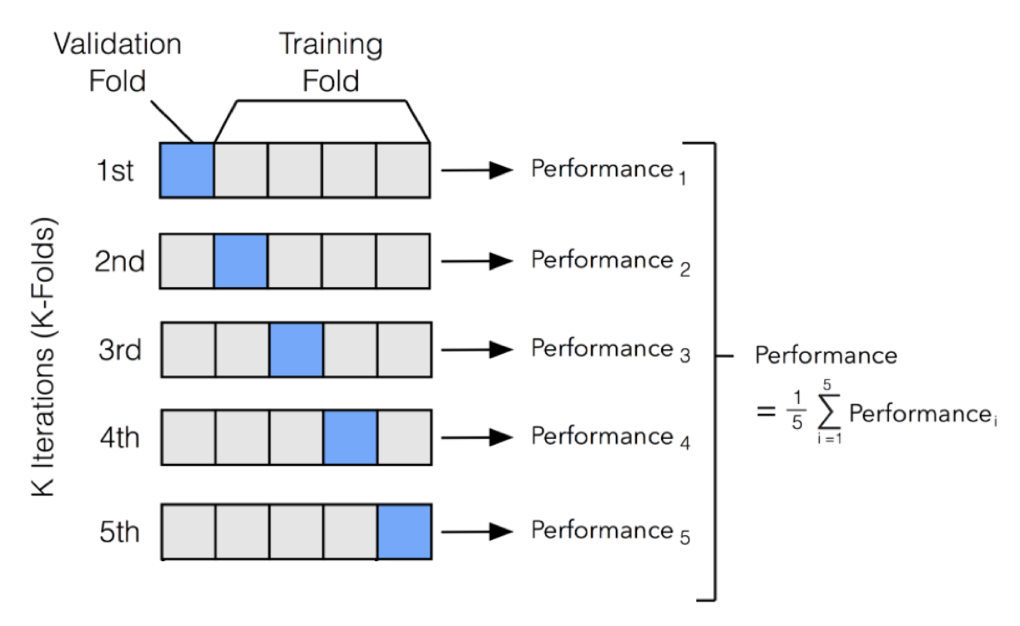

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_validate(lr, train_input, train_target)
print(scores)

{'fit_time': array([0.0215044 , 0.01464272, 0.01776648, 0.01572752, 0.01592875]), 'score_time': array([0.00118756, 0.00101542, 0.0010221 , 0.00097489, 0.00112009]), 'test_score': array([0.77252747, 0.78241758, 0.77447745, 0.78987899, 0.7909791 ])}


In [ ]:
import numpy as np

print(np.mean(scores['test_score']))

0.7820561176996821


In [ ]:
# 훈련세트를 다시 섞어서 폴드를 나눈다 : startifieldKFold

from sklearn.model_selection import StratifiedKFold

scores = cross_validate(lr, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.7820561176996821


#2. 설명하기 쉬운 모델과 어려운 모델

In [ ]:
#모형의 절편, 기술기

print(lr.coef_, lr.intercept_)

[[ 0.45101032  0.34970086 -4.21135735]] [8.67699232]


위와 같이 설명할 경우에는 이해하기 어려울 수 있다. 따라서 순서도 형태로 "그림"으로 보여준다.

##3. 결정 트리 (자율 과제)

In [ ]:
#결정트리를 만들어서 모형을 만든다 : 스무고개 하는 방식

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

#여기서도 random_statef를 사용했는데 그 이유는?

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9971409720694964
0.8671794871794872


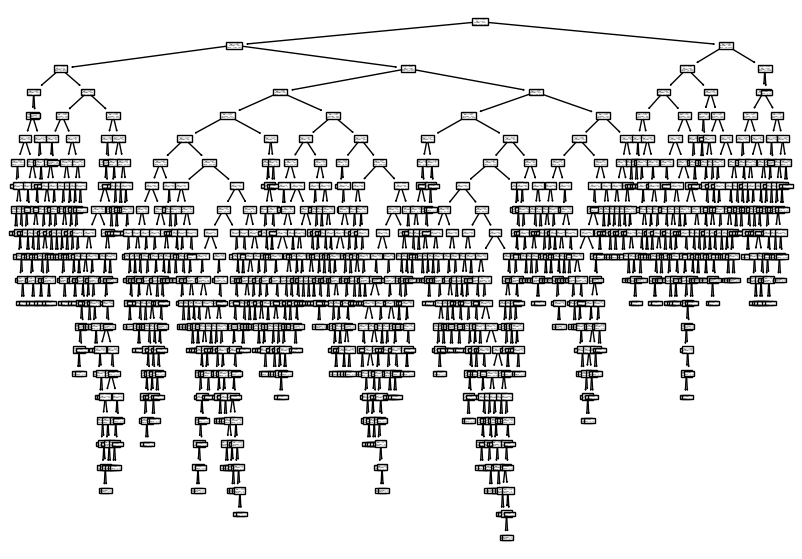

In [ ]:
#분류 과정을 시각화해서 보여준다.
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

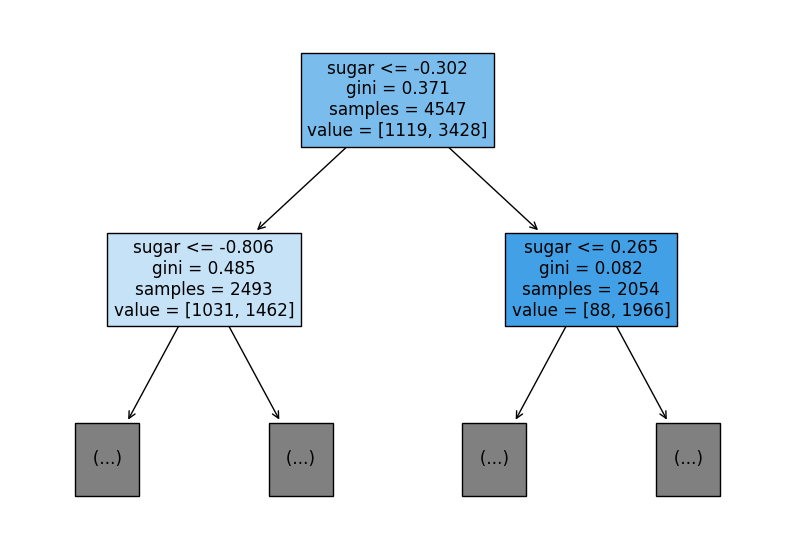

In [ ]:
# 위의 tree가 너무 복잡하기 때문에 간단하게 해서 보여준다.

plt.figure(figsize=(10,7))

#max_depth(매개변수를 1로 준다 : 루트노드 하나를 제외하고 하나 더 그려줌]
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

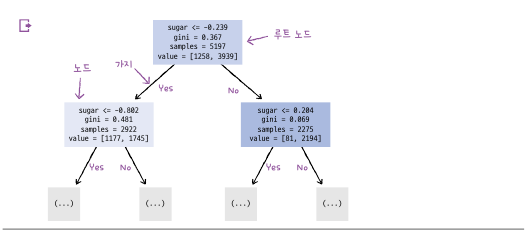

##4. 가지치기

In [ ]:
#max_depth=3 (매개변수를 3로 준다 : 로트노투 하나를 제외하고 3개 더 그려줌]

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8482515944578843
0.8451282051282051


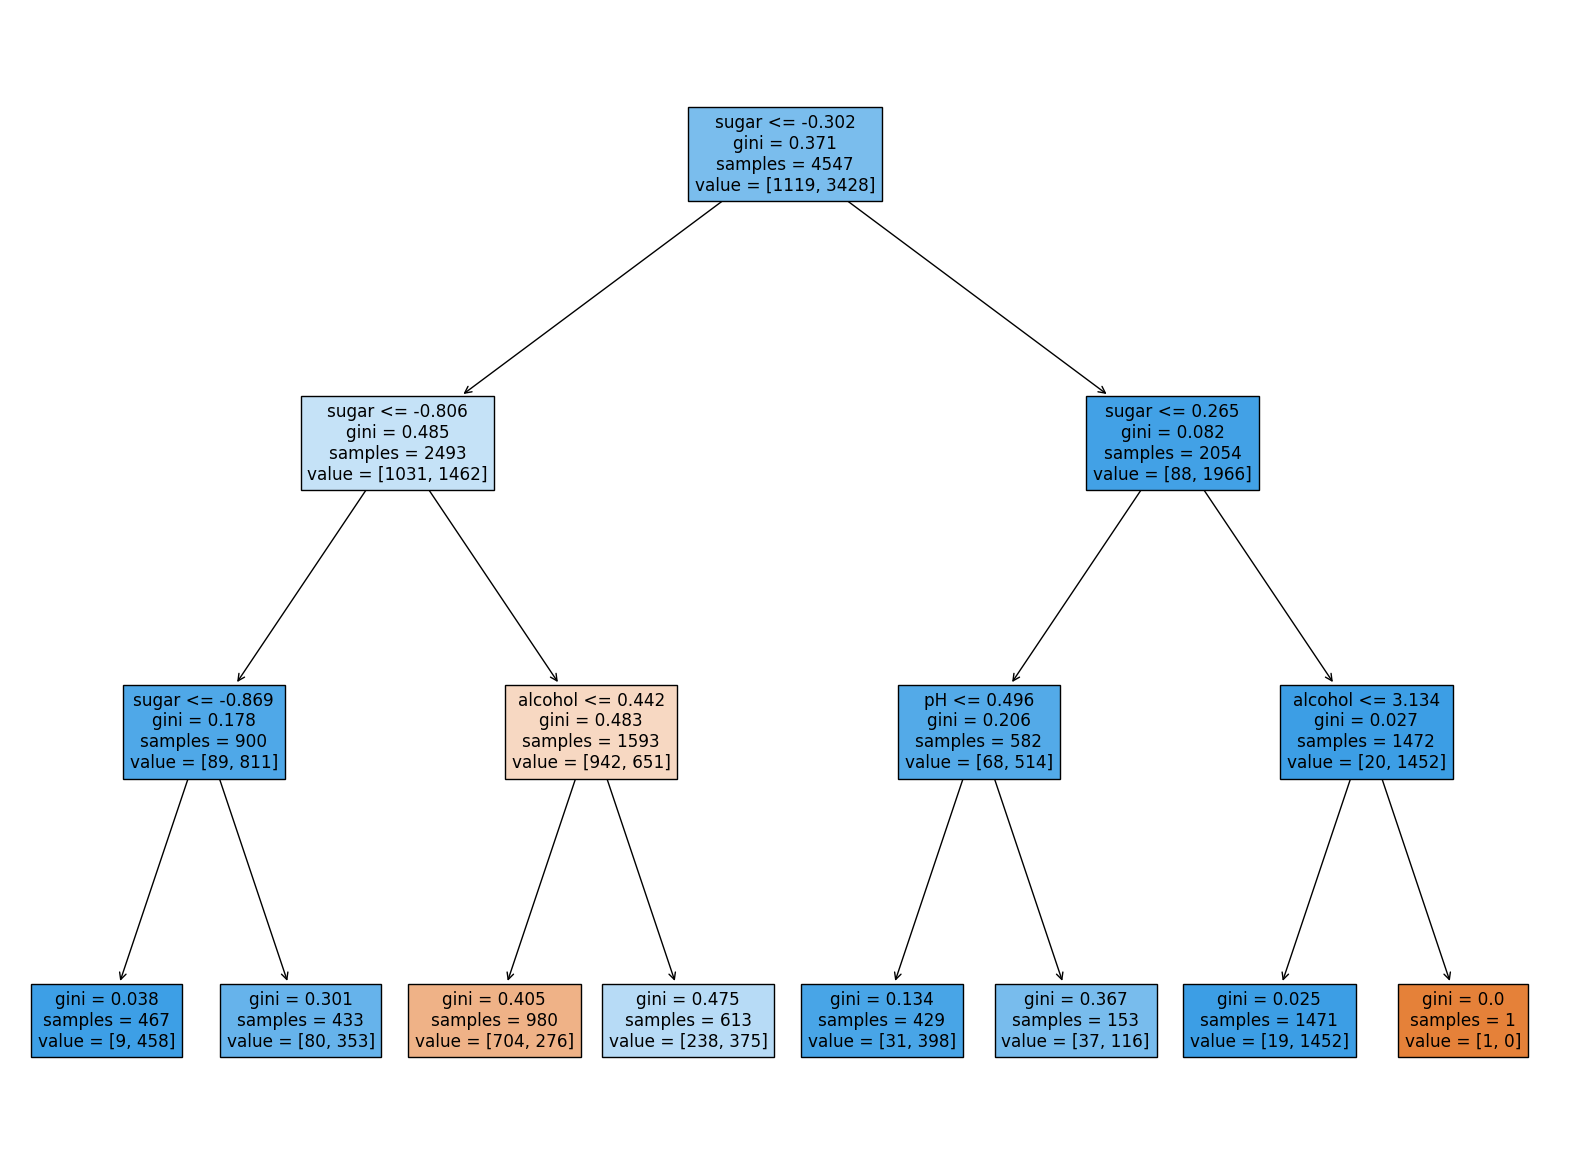

In [ ]:
#그림으로 보면서 노드의 단계를 확인

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=9, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.9170881900153948
0.8569230769230769


In [ ]:
dt = DecisionTreeClassifier(max_depth=9, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.9170881900153948
0.8564102564102564


In [ ]:
#교차검증
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00880265, 0.00599194, 0.00587034, 0.00631976, 0.00569057]), 'score_time': array([0.00133395, 0.00101399, 0.0009594 , 0.00092649, 0.00090861]), 'test_score': array([0.84725275, 0.86043956, 0.82728273, 0.86028603, 0.83938394])}


In [ ]:
import numpy as np

print(np.mean(scores['test_score']))

0.846929000592367


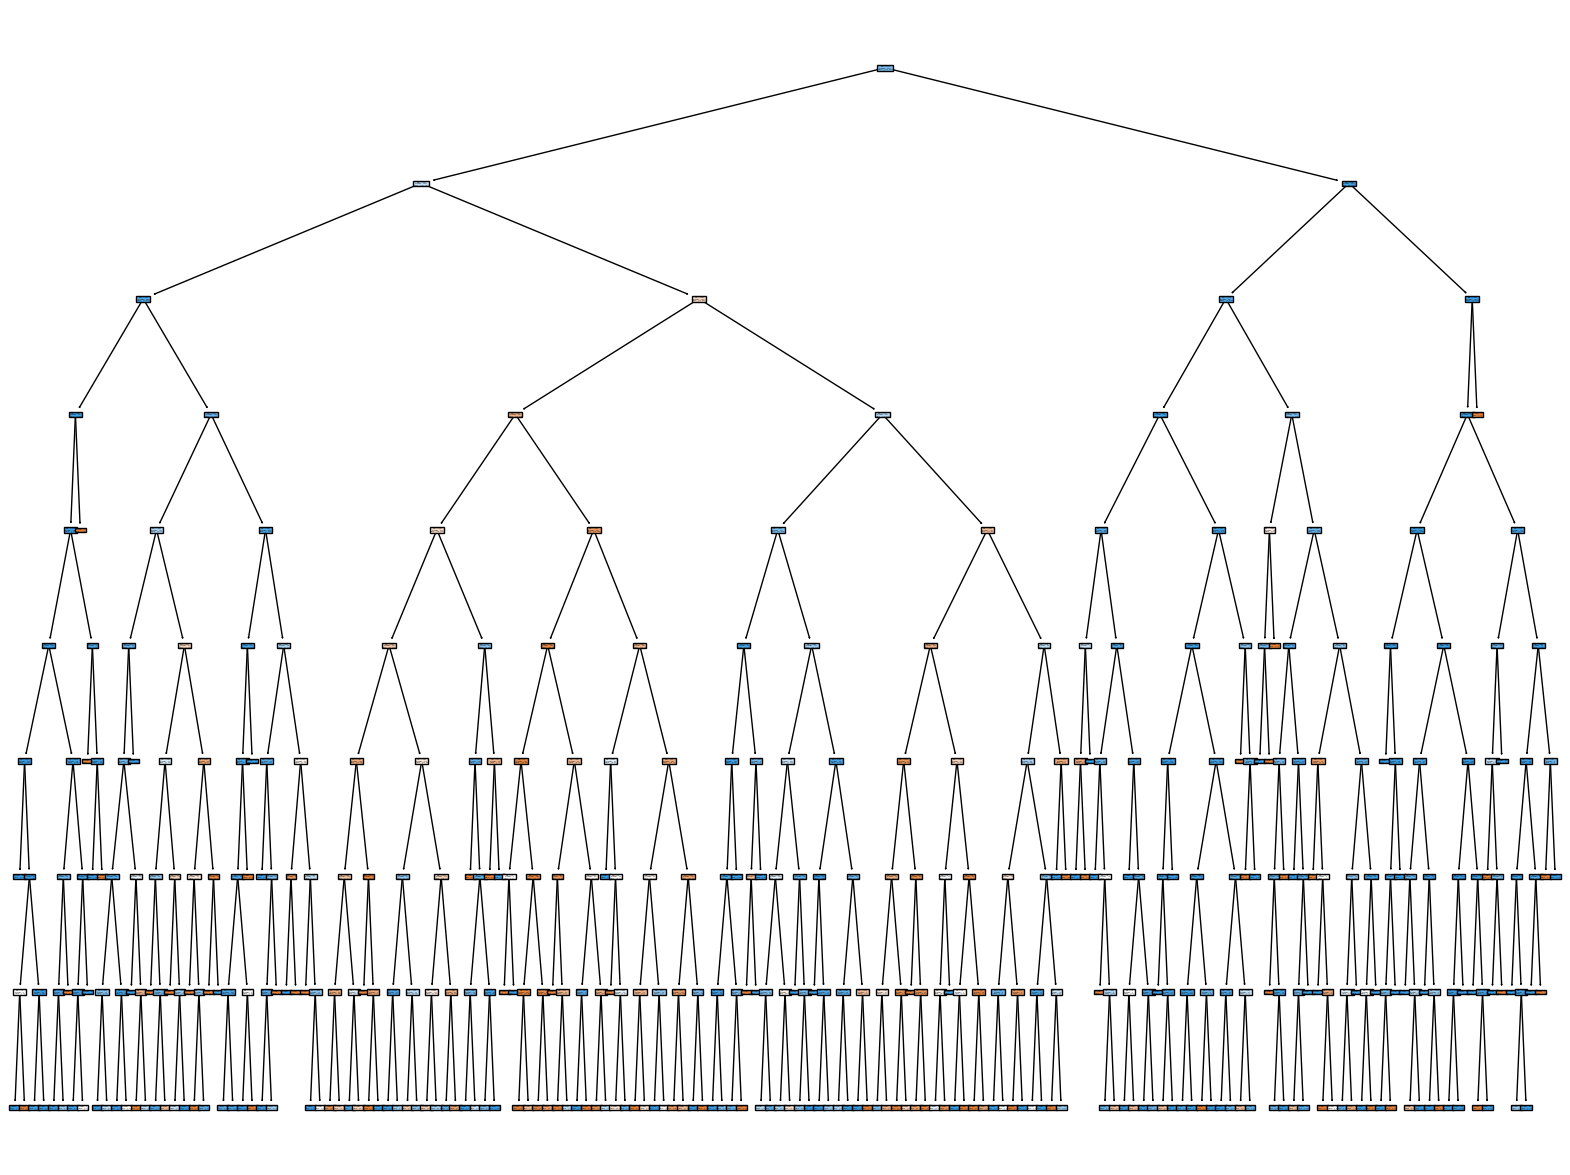

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
#어떤 요인이 크게 작용했는지 볼 수 있음
print(dt.feature_importances_)


#plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

[0.12696302 0.86666515 0.00637183]
